In [1]:
 import numpy as np
 import pandas as pd
 from pgmpy.models import BayesianNetwork
 from pgmpy.estimators import MaximumLikelihoodEstimator
 from pgmpy.inference import VariableElimination
 import matplotlib.pyplot as plt
 import networkx as nx

In [3]:
# Step 1: Read Cleveland Heart Disease data
heartDisease = pd.read_csv('heart.csv')
heartDisease = heartDisease.replace('?', np.nan)

In [6]:
heartDisease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
# Step 2: Bin the cholesterol levels
bins = [0, 200, 240, 300] # 0-200: Low, 200-240: Medium, 240-300: High
labels = ['Low', 'Medium', 'High']
heartDisease['chol_bin'] = pd.cut(heartDisease['chol'], bins=bins, labels=labels)

In [11]:

# Step 3: Define the Bayesian Network structure
model = BayesianNetwork([
    ('age', 'trestbps'),
    ('age', 'fbs'),
    ('sex', 'trestbps'),
    ('exang', 'trestbps'),
    ('trestbps', 'target'),
    ('fbs', 'target'),
    ('target', 'restecg'),
    ('target', 'thalach'),
    ('target', 'chol_bin')
])

In [12]:
# Step 4: Learn CPDs using Maximum Likelihood Estimators
model.fit(heartDisease, estimator=MaximumLikelihoodEstimator)

In [38]:
# Step 5: Visualize the Bayesian Network using NetworkX with enhanced clarity
plt.figure(figsize=(12, 10))
G = nx.DiGraph()

<Figure size 1200x1000 with 0 Axes>

In [39]:
# Add nodes and edges from the model
for node in model.nodes():
    G.add_node(node)
for edge in model.edges():
    G.add_edge(edge[0], edge[1])

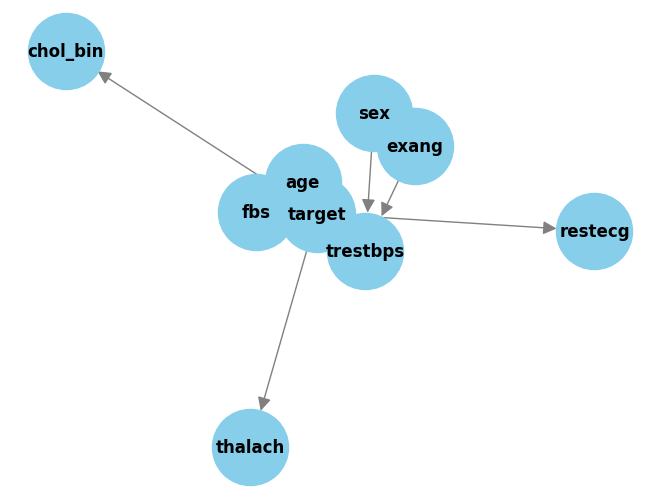

In [40]:
# Define position layout and visual settings for clarity
pos = nx.spring_layout(G, seed=42)  # Consistent layout
nx.draw(G, pos, with_labels=True, arrows=True, 
        node_color='skyblue', node_size=3000, 
        edge_color='gray', font_size=12, font_weight='bold', 
        arrowsize=20, arrowstyle='-|>')

In [43]:
# Step 6: Inferencing with the Bayesian Network
heartDisease_infer = VariableElimination(model)

In [44]:
# Query 1: Probability of Heart Disease given Age 35
q1 = heartDisease_infer.query(variables=['target'], evidence={'age': 35})
print('\n1. Probability of Heart Disease given Age 35:\n', q1)


1. Probability of Heart Disease given Age 35:
 +-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.2826 |
+-----------+---------------+
| target(1) |        0.7174 |
+-----------+---------------+


In [45]:
# Query 2: Probability of Heart Disease given High Cholesterol
q2 = heartDisease_infer.query(variables=['target'], evidence={'chol_bin': 'High'})
print('\n2. Probability of Heart Disease given High Cholesterol:\n', q2)


2. Probability of Heart Disease given High Cholesterol:
 +-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.5467 |
+-----------+---------------+
| target(1) |        0.4533 |
+-----------+---------------+
